In [22]:
import pandas as pd
import numpy as np

df = pd.read_pickle("../../data/interim/rating.pkl")
df

,user_id,item_id,parent_asin,rating,timestamp
0,0,548,B000CRFOMK,5.0,1422549495000
0,0,2528,B003MVZ60S,5.0,1340409020000
0,0,2671,B003XIJ566,5.0,1395513662000
0,0,2938,B004AM5RB6,1.0,1300396593000
0,0,3204,B004P15HD0,5.0,1374019952000
...,...,...,...,...,...
4998,4998,25141,B0BDT4L4FJ,4.0,1499699601275
4998,4998,25267,B0BGJLM3T7,4.0,1658051722244
4998,4998,26025,B0BS2SLDVY,4.0,1596555554593
4998,4998,26494,B0BYJSHNQ6,4.0,1636381963196


In [23]:
df[df["item_id"].isna()]

,user_id,item_id,parent_asin,rating,timestamp


In [24]:
df["item_id"].max(), pd.unique(df["item_id"]).shape

(27582, (27583,))

In [25]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df['date'] = df['timestamp'].dt.date
df

,user_id,item_id,parent_asin,rating,timestamp,date
0,0,548,B000CRFOMK,5.0,2015-01-29 16:38:15.000,2015-01-29
0,0,2528,B003MVZ60S,5.0,2012-06-22 23:50:20.000,2012-06-22
0,0,2671,B003XIJ566,5.0,2014-03-22 18:41:02.000,2014-03-22
0,0,2938,B004AM5RB6,1.0,2011-03-17 21:16:33.000,2011-03-17
0,0,3204,B004P15HD0,5.0,2013-07-17 00:12:32.000,2013-07-17
...,...,...,...,...,...,...
4998,4998,25141,B0BDT4L4FJ,4.0,2017-07-10 15:13:21.275,2017-07-10
4998,4998,25267,B0BGJLM3T7,4.0,2022-07-17 09:55:22.244,2022-07-17
4998,4998,26025,B0BS2SLDVY,4.0,2020-08-04 15:39:14.593,2020-08-04
4998,4998,26494,B0BYJSHNQ6,4.0,2021-11-08 14:32:43.196,2021-11-08


In [26]:
df = df.sort_values(by="date")
df

,user_id,item_id,parent_asin,rating,timestamp,date
1126,1126,7379,B00GN7GVCK,4.0,2000-06-29 13:36:59.000,2000-06-29
4854,4854,70,B00005AW1H,4.0,2001-07-28 19:44:53.000,2001-07-28
3369,3369,83,B00005T6GZ,5.0,2001-11-22 19:56:43.000,2001-11-22
416,416,7379,B00GN7GVCK,5.0,2001-12-29 18:44:58.000,2001-12-29
3369,3369,33,B00004SB92,5.0,2002-01-22 20:38:29.000,2002-01-22
...,...,...,...,...,...,...
2136,2136,24861,B0B87L83J7,1.0,2023-05-20 08:23:29.737,2023-05-20
1954,1954,26969,B0C46Q997Y,3.0,2023-05-22 22:45:48.094,2023-05-22
3022,3022,27127,B0C5MF2LCQ,5.0,2023-05-31 17:56:41.638,2023-05-31
4968,4968,22647,B0957LDLH1,5.0,2023-06-07 03:18:47.618,2023-06-07


In [27]:
grouped = df.groupby(["user_id"]).agg({"date": lambda x: x.tolist(), "rating": lambda x: x.tolist(), "item_id": lambda x: x.tolist()}).reset_index(drop=False)
grouped

,user_id,date,rating,item_id
0,0,"[2011-03-17, 2011-05-13, 2012-05-05, 2012-05-0...","[1.0, 4.0, 4.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, ...","[2938, 10635, 26211, 18543, 13389, 16382, 2528..."
1,1,"[2014-02-01, 2014-04-09, 2014-05-15, 2014-05-1...","[5.0, 5.0, 5.0, 5.0, 5.0, 3.0, 1.0, 5.0, 5.0, ...","[6794, 9397, 12027, 2116, 4172, 1100, 6795, 68..."
2,2,"[2018-11-28, 2018-11-28, 2019-04-27, 2019-05-0...","[5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 2.0, 5.0, ...","[14380, 15424, 25817, 21095, 17369, 26802, 192..."
3,3,"[2016-10-02, 2022-07-17, 2022-07-22, 2022-07-2...","[5.0, 1.0, 5.0, 5.0, 5.0, 1.0, 5.0, 1.0, 5.0, ...","[12939, 21583, 22966, 22762, 27299, 14302, 199..."
4,4,"[2013-06-26, 2013-10-07, 2014-07-05, 2016-08-2...","[5.0, 5.0, 5.0, 5.0, 3.0, 5.0, 4.0, 5.0, 5.0, ...","[5147, 1863, 9871, 9860, 13686, 19014, 16456, ..."
...,...,...,...,...
4994,4994,"[2017-01-05, 2017-07-24, 2018-08-05, 2019-07-1...","[5.0, 3.0, 5.0, 1.0, 5.0, 5.0, 5.0, 4.0, 5.0, ...","[11104, 27028, 5103, 23785, 10367, 17703, 2603..."
4995,4995,"[2013-03-21, 2013-03-21, 2013-07-14, 2013-08-1...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[2156, 932, 25036, 2059, 2089, 22666, 597, 457..."
4996,4996,"[2008-11-12, 2009-09-24, 2010-02-27, 2010-04-0...","[4.0, 5.0, 5.0, 5.0, 4.0, 3.0, 5.0, 5.0, 5.0, ...","[1106, 1875, 701, 1379, 3482, 78, 1506, 10565,..."
4997,4997,"[2014-05-20, 2014-08-14, 2014-08-14, 2014-08-1...","[5.0, 5.0, 5.0, 5.0, 4.0, 5.0, 4.0, 5.0, 5.0, ...","[7071, 25633, 11074, 16392, 7578, 8054, 5468, ..."


In [28]:
from collections import Counter
from tqdm import tqdm

window_size = 5
is_sequence_lst = []
for i in tqdm(range(len(grouped))):
    tmp_date = grouped["date"][i]
    count = Counter(tmp_date)
    indices = [count[element] >= window_size+1  for index, element in enumerate(tmp_date) ]
    is_sequence_lst.append(indices)
tmp_date, indices

100%|██████████| 4999/4999 [00:00<00:00, 32888.27it/s]


([datetime.date(2016, 11, 18),
  datetime.date(2016, 12, 27),
  datetime.date(2017, 1, 3),
  datetime.date(2017, 3, 7),
  datetime.date(2017, 4, 25),
  datetime.date(2017, 6, 2),
  datetime.date(2017, 7, 10),
  datetime.date(2017, 9, 7),
  datetime.date(2017, 10, 3),
  datetime.date(2018, 6, 4),
  datetime.date(2018, 9, 19),
  datetime.date(2018, 9, 28),
  datetime.date(2018, 10, 2),
  datetime.date(2018, 11, 6),
  datetime.date(2018, 11, 6),
  datetime.date(2018, 11, 21),
  datetime.date(2018, 12, 27),
  datetime.date(2019, 1, 28),
  datetime.date(2019, 4, 8),
  datetime.date(2019, 5, 17),
  datetime.date(2019, 6, 20),
  datetime.date(2019, 8, 12),
  datetime.date(2019, 10, 8),
  datetime.date(2019, 11, 23),
  datetime.date(2019, 11, 24),
  datetime.date(2020, 7, 13),
  datetime.date(2020, 7, 13),
  datetime.date(2020, 8, 4),
  datetime.date(2020, 8, 4),
  datetime.date(2020, 9, 3),
  datetime.date(2021, 2, 20),
  datetime.date(2021, 5, 10),
  datetime.date(2021, 5, 28),
  datetime.da

In [29]:
grouped["is_sequence_lst"] = is_sequence_lst
grouped

,user_id,date,rating,item_id,is_sequence_lst
0,0,"[2011-03-17, 2011-05-13, 2012-05-05, 2012-05-0...","[1.0, 4.0, 4.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, ...","[2938, 10635, 26211, 18543, 13389, 16382, 2528...","[False, False, False, False, False, False, Fal..."
1,1,"[2014-02-01, 2014-04-09, 2014-05-15, 2014-05-1...","[5.0, 5.0, 5.0, 5.0, 5.0, 3.0, 1.0, 5.0, 5.0, ...","[6794, 9397, 12027, 2116, 4172, 1100, 6795, 68...","[False, False, False, False, False, False, Fal..."
2,2,"[2018-11-28, 2018-11-28, 2019-04-27, 2019-05-0...","[5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 2.0, 5.0, ...","[14380, 15424, 25817, 21095, 17369, 26802, 192...","[False, False, False, False, False, False, Fal..."
3,3,"[2016-10-02, 2022-07-17, 2022-07-22, 2022-07-2...","[5.0, 1.0, 5.0, 5.0, 5.0, 1.0, 5.0, 1.0, 5.0, ...","[12939, 21583, 22966, 22762, 27299, 14302, 199...","[False, False, False, False, False, False, Fal..."
4,4,"[2013-06-26, 2013-10-07, 2014-07-05, 2016-08-2...","[5.0, 5.0, 5.0, 5.0, 3.0, 5.0, 4.0, 5.0, 5.0, ...","[5147, 1863, 9871, 9860, 13686, 19014, 16456, ...","[False, False, False, False, False, False, Fal..."
...,...,...,...,...,...
4994,4994,"[2017-01-05, 2017-07-24, 2018-08-05, 2019-07-1...","[5.0, 3.0, 5.0, 1.0, 5.0, 5.0, 5.0, 4.0, 5.0, ...","[11104, 27028, 5103, 23785, 10367, 17703, 2603...","[False, False, False, False, False, False, Fal..."
4995,4995,"[2013-03-21, 2013-03-21, 2013-07-14, 2013-08-1...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[2156, 932, 25036, 2059, 2089, 22666, 597, 457...","[False, False, False, False, False, False, Fal..."
4996,4996,"[2008-11-12, 2009-09-24, 2010-02-27, 2010-04-0...","[4.0, 5.0, 5.0, 5.0, 4.0, 3.0, 5.0, 5.0, 5.0, ...","[1106, 1875, 701, 1379, 3482, 78, 1506, 10565,...","[False, False, False, False, False, False, Fal..."
4997,4997,"[2014-05-20, 2014-08-14, 2014-08-14, 2014-08-1...","[5.0, 5.0, 5.0, 5.0, 4.0, 5.0, 4.0, 5.0, 5.0, ...","[7071, 25633, 11074, 16392, 7578, 8054, 5468, ...","[False, False, False, False, False, False, Fal..."


In [30]:
score_df = grouped.explode(["date", "is_sequence_lst", "item_id", "rating"])
score_df

,user_id,date,rating,item_id,is_sequence_lst
0,0,2011-03-17,1.0,2938,False
0,0,2011-05-13,4.0,10635,False
0,0,2012-05-05,4.0,26211,False
0,0,2012-05-05,5.0,18543,False
0,0,2012-05-05,4.0,13389,False
...,...,...,...,...,...
4998,4998,2021-02-20,5.0,22021,False
4998,4998,2021-05-10,4.0,24555,False
4998,4998,2021-05-28,5.0,22764,False
4998,4998,2021-11-08,4.0,26494,False


## longtail

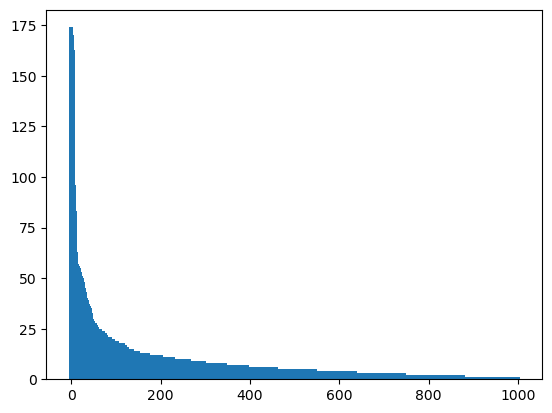

In [31]:
import matplotlib.pyplot as plt
import numpy as np

longtail_df = score_df.groupby("item_id").agg({
    "rating": lambda x: x.tolist()
}).reset_index(drop=False)
item_len = np.array(longtail_df["rating"].apply(lambda x: len(x)))
item_id_lst = np.array(longtail_df["item_id"].to_numpy())

vis_item_len = np.random.choice(item_len, size=1000)
vis_item_len = np.sort(vis_item_len)[::-1]
plt.bar([i for i in range(len(vis_item_len))],vis_item_len, width=10)
plt.show()

In [32]:
print(np.percentile(item_len, 80), np.percentile(item_len, 99))

is_head_lst = np.zeros_like(item_len)
sorted_idx = np.argsort(item_len)[::-1]
item_id_lst = item_id_lst[sorted_idx]
item_len = item_len[sorted_idx]

is_head_lst[:int(item_len.shape[0]*0.2)] = 1

item_len, is_head_lst, item_id_lst

11.0 68.0


(array([507, 479, 410, ...,   1,   1,   1]),
 array([1, 1, 1, ..., 0, 0, 0]),
 array([13205, 10933, 25277, ..., 20699, 14421, 18159]))

In [33]:
longtail_df["item_id"] = item_id_lst
longtail_df["is_head"] = is_head_lst
longtail_df["item_len"] = item_len
del longtail_df["rating"]
longtail_df

,item_id,is_head,item_len
0,13205,1,507
1,10933,1,479
2,25277,1,410
3,18884,1,308
4,15424,1,308
...,...,...,...
27578,14424,0,1
27579,14423,0,1
27580,20699,0,1
27581,14421,0,1


In [34]:
pd.unique(longtail_df["item_id"]).shape

(27583,)

In [35]:
x = np.array(is_head_lst)
x[x==0].shape, x[x==1].shape

((22067,), (5516,))

## sequence df

In [36]:
score_df = pd.merge(score_df, longtail_df, on="item_id", how="left")
score_df = score_df.sort_values("item_len")
score_df

,user_id,date,rating,item_id,is_sequence_lst,is_head,item_len
95375,1978,2015-09-14,5.0,9646,False,0,1
61106,1274,2017-07-08,5.0,8070,False,0,1
147419,3050,2020-02-05,4.0,21756,False,0,1
147411,3050,2019-04-07,4.0,6542,False,0,1
8297,164,2020-07-24,1.0,19267,False,0,1
...,...,...,...,...,...,...,...
19924,404,2016-11-02,5.0,13205,False,1,507
215288,4446,2017-10-25,4.0,13205,False,1,507
28310,589,2018-01-11,5.0,13205,False,1,507
183852,3781,2016-12-27,5.0,13205,False,1,507


In [37]:
sequence_df = score_df[score_df["is_sequence_lst"]].reset_index(drop=True)
sequence_df

,user_id,date,rating,item_id,is_sequence_lst,is_head,item_len
0,3045,2020-07-18,5.0,16975,True,0,1
1,1280,2021-06-05,5.0,20607,True,0,1
2,3052,2019-02-05,5.0,26885,True,0,1
3,1263,2019-06-10,5.0,18186,True,0,1
4,1292,2018-09-17,5.0,11119,True,0,1
...,...,...,...,...,...,...,...
35498,4930,2017-01-14,5.0,13205,True,1,507
35499,4356,2018-02-25,5.0,13205,True,1,507
35500,4241,2018-04-08,5.0,13205,True,1,507
35501,2112,2017-04-07,4.0,13205,True,1,507


In [38]:
sequence_df = sequence_df.groupby(["user_id", "date"]).agg({
    "item_id": lambda x: x.tolist(),
    "rating": lambda x: x.tolist(), 
    "is_head": lambda x: x.tolist()
}).reset_index(drop=False)
sequence_df

,user_id,date,item_id,rating,is_head
0,5,2015-03-27,"[1740, 2122, 5909, 7031, 10230, 10229]","[4.0, 5.0, 4.0, 5.0, 4.0, 5.0]","[0, 1, 1, 1, 1, 1]"
1,5,2016-02-24,"[6468, 7833, 7390, 5752, 15457, 26034, 10345, ...","[4.0, 4.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0]","[0, 0, 0, 1, 1, 1, 1, 1]"
2,9,2014-03-04,"[450, 451, 12373, 24897, 4126, 18538, 14490]","[5.0, 5.0, 2.0, 1.0, 5.0, 4.0, 5.0]","[0, 0, 0, 1, 1, 1, 1]"
3,11,2014-11-21,"[9667, 4965, 15126, 964, 25114, 25655]","[5.0, 1.0, 2.0, 5.0, 5.0, 3.0]","[0, 1, 1, 1, 1, 1]"
4,15,2014-12-23,"[2044, 12111, 5989, 822, 13799, 23050]","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0]","[1, 1, 1, 1, 1, 1]"
...,...,...,...,...,...
3717,4982,2018-07-13,"[8072, 7262, 8068, 11539, 21846, 12761, 12802,...","[3.0, 5.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, ..."
3718,4982,2019-10-05,"[10528, 15630, 25791, 17522, 22835, 9333]","[5.0, 5.0, 4.0, 5.0, 5.0, 4.0]","[0, 0, 0, 0, 1, 1]"
3719,4993,2016-09-06,"[13795, 6027, 5367, 51, 2434, 24964, 2547, 156...","[5.0, 1.0, 4.0, 4.0, 5.0, 5.0, 4.0, 5.0, 5.0, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
3720,4993,2019-04-09,"[20746, 1234, 14726, 9977, 14716, 17894, 16448...","[2.0, 5.0, 5.0, 1.0, 4.0, 4.0, 5.0, 3.0, 5.0, ...","[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [39]:
user_id_lst, date_lst, item_id_lst, rating_lst, is_head_lst = [], [], [], [], []

for idx, row in tqdm(sequence_df.iterrows()):
    tmp_lst = row["item_id"]
    for i in range(len(tmp_lst) - window_size):
        user_id_lst.append(row["user_id"])
        date_lst.append(row["date"])
        rating_lst.append(row["rating"][i:i+window_size+1])
        is_head_lst.append(row["is_head"][i:i+window_size+1])
        item_id_lst.append(tmp_lst[i:i+window_size+1])

3722it [00:00, 6736.85it/s] 


In [40]:
train_test_df = pd.DataFrame({
    "user_id": user_id_lst,
    "date": date_lst,
    "item_id": item_id_lst,
    "rating": rating_lst,
    "is_head": is_head_lst
})

train_test_df

,user_id,date,item_id,rating,is_head
0,5,2015-03-27,"[1740, 2122, 5909, 7031, 10230, 10229]","[4.0, 5.0, 4.0, 5.0, 4.0, 5.0]","[0, 1, 1, 1, 1, 1]"
1,5,2016-02-24,"[6468, 7833, 7390, 5752, 15457, 26034]","[4.0, 4.0, 5.0, 4.0, 5.0, 5.0]","[0, 0, 0, 1, 1, 1]"
2,5,2016-02-24,"[7833, 7390, 5752, 15457, 26034, 10345]","[4.0, 5.0, 4.0, 5.0, 5.0, 5.0]","[0, 0, 1, 1, 1, 1]"
3,5,2016-02-24,"[7390, 5752, 15457, 26034, 10345, 18335]","[5.0, 4.0, 5.0, 5.0, 5.0, 5.0]","[0, 1, 1, 1, 1, 1]"
4,9,2014-03-04,"[450, 451, 12373, 24897, 4126, 18538]","[5.0, 5.0, 2.0, 1.0, 5.0, 4.0]","[0, 0, 0, 1, 1, 1]"
...,...,...,...,...,...
16888,4993,2019-04-09,"[8394, 12235, 25185, 21281, 23606, 14018]","[3.0, 5.0, 5.0, 4.0, 5.0, 5.0]","[1, 1, 1, 1, 1, 1]"
16889,4993,2019-04-09,"[12235, 25185, 21281, 23606, 14018, 21547]","[5.0, 5.0, 4.0, 5.0, 5.0, 5.0]","[1, 1, 1, 1, 1, 1]"
16890,4993,2019-09-16,"[15370, 5784, 17893, 16523, 11703, 7327]","[5.0, 4.0, 5.0, 4.0, 4.0, 5.0]","[0, 0, 0, 0, 1, 1]"
16891,4993,2019-09-16,"[5784, 17893, 16523, 11703, 7327, 27390]","[4.0, 5.0, 4.0, 4.0, 5.0, 3.0]","[0, 0, 0, 1, 1, 1]"


In [41]:
train_test_df.to_pickle("../../data/processed/rating_session.pkl")

In [42]:
longtail_df.to_pickle("../../data/processed/longtail_indicator.pkl")